In [ ]:
!unzip '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터.zip'

In [ ]:
# 코드 실행 파일 경로 변경 설명
# 코드 실행 전에 꼭 아래 코드의 파일 경로 설정을 완료해 주시고 실행해 주세요.

# 1. path 는 eyerpt, rpt 데이터가 들어가 있는 폴더 경로에 해당합니다. 

# 2. SNSB_path 는 SNSB 점수 데이터 csv 파일 경로에 해당합니다.

# 3. data_save_path 는 eyerpt feature csv 파일 저장 경로입니다. 경로 지정 시에 파일 이름을 panel_time.csv 파일로 설정해주세요.

# 4. path2 는 VEEM 대상자 정보.csv 파일 경로에 해당합니다. 

# 5. modify_path 는 rpt feature csv 파일 저장 경로입니다. 경로 지정 시에 파일 이름을 result_modify.csv 파일로 설정해주세요.

# 6. final_path 는 최종 전처리 결과 파일 (eyerpt feature csv + rpt feature csv)경로에 해당합니다. 경로 지정 시에 파일 이름을 final_result.csv 파일로 설정해주세요.

# 7. "이 다음부터는 rpt data 변수 전처리 과정입니다." 부분의 하위 코드 중 "3. csv파일을 Dataframe으로 읽어 각각 변수에 지정해준다."  코멘트 바로 아래 for문의 코드의 경로를 
#    'path경로/rpt_data/' 설정해주세요.  예시 -> /content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/rpt_data/
#                                               (                                       path 경로 부분                                            )(       )

# rpt data 전처리 과정에서 eyerpt와 rpt 파일을 분리 해서 전처리를 진행하기 위해서 파일의 이름이 바뀌므로 파일 경로 설정이 잘못되었을 경우 재실행시 계속해서 오류가 발생할 수 있습니다. 
# 패스 경로 설정 누락으로 인한 코드 실행 오류시에는 데이터 파일 폴더를 지우고 데이터 파일을 리셋하여야 합니다. 

In [ ]:
# SNSB score Regression model 설명
# SNSB score는 같은 모델로 테스트 별로 각각 학습이 진행되었습니다. 

# 모델 결과 실행 시 test_num 바꿔가면서 설정해주세요! 예시 -> test_num = 1
# 1 : DST_F+B
# 2 : S-K-BNT
# 3 : RCFT_copyscore
# 4 : SVLT_delatedrecall
# 5 : K-TMT-E_B
# 
# 테스트 별 모델 저장은 path경로에 저장됩니다. 
# 모델 파일 이름은 regression_(test 번호).h5 로 저장됩니다. 

In [2]:
import os

path = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'             # eyerpt, rpt 데이터가 들어가 있는 폴더 경로
SNSB_path = "/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM SNSB 데이터.csv"   # SNSB 점수 데이터 경로 
data_save_path = "/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/panel_time.csv"    # eyerpt feature csv 파일 저장 경로  

path_a = path[:-1]   # '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터'
os.chdir(path_a)
src = path
os.mkdir('rpt_data')
dir = path + 'rpt_data/'
os.chdir('/content')  # 상위 폴더로 이동

path1 = dir
path2 =  '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM 대상자 정보.csv'  #대상자 정보 csv 경로

modify_path = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/result_modify.csv'  # rpt feature csv 파일 저장 경로
final_path = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/final_result.csv' # 최종 전처리 결과 (eyerpt feature csv + rpt feature csv)경로, 해당파일로 학습 진행


# **"하단은 eyerpt data 변수 전처리 과정입니다."**

In [3]:
# colab에서 구동시 드라이브 파일을 불러오기 위한 코드
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
# 필요한 모듈 임포트

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches

import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm 

In [6]:
file_path = os.listdir(path)
file_path_list = [path + file for file in file_path if file.endswith('rpt.csv')]
file_path_list.sort()

eye_path_list = []
rpt_path_list = []

for path_tmp in file_path_list:
    if path_tmp[-10:] == 'eyerpt.csv':
        eye_path_list.append(path_tmp)
    else:
        rpt_path_list.append(path_tmp)

print(eye_path_list)
print(rpt_path_list)

['/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/02_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/03_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/04_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/06_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/07_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/08_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/09_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/10_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/11_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/12_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/13_eyerpt.csv', '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/14_eyerpt.csv', '/content/딥러닝 텀 프로

In [7]:
panel_info = {'1': ["instore","takeout"], '2': ["ham1","ham2","ham3","ham4","ham5","ham6","ham7","ham8","back"],'3':["side1","side2","side3","side4","side5","side6","side7","side8","back"],'4':["bev1","bev2","bev3","bev4","bev5","bev6","bev7","bev8","back"],'5':["card","mobile","back"],'6':["n1","n2","n3","n4","n5","n6","n7","n8","n9","delete","n0","ok","back"]}

#1. 단계별로 걸린 시간 구하기

In [8]:
from decimal import Decimal

def Panel_Time(csv_path):
    csv_test = pd.read_csv(csv_path)
    x = csv_test.loc[:,'Panel_X']
    x = x.to_numpy()
    step = csv_test.loc[:, 'Panel_num']

    panel_img_num = list(panel_info.keys())
        
    for j in panel_img_num:

        num = int(j)

        if num == 1:
            data_indecis = np.where(step==num)
            data_1 = x[data_indecis]
        if num == 2:
            data_indecis = np.where(step==num)
            data_2 = x[data_indecis]
        if num == 3:
            data_indecis = np.where(step==num)
            data_3 = x[data_indecis]
        if num == 4:
            data_indecis = np.where(step==num)
            data_4 = x[data_indecis]
        if num == 5:
            data_indecis = np.where(step==num)
            data_5 = x[data_indecis]
        #6단계는 panle_num = 7
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_6 = x[data_indecis]

    time_list = []
    time_1 = float(Decimal(str(len(data_1)))*Decimal('0.1'))
    time_2 = float(Decimal(str(len(data_2)))*Decimal('0.1'))
    time_3 = float(Decimal(str(len(data_3)))*Decimal('0.1'))
    time_4 = float(Decimal(str(len(data_4)))*Decimal('0.1'))
    time_5 = float(Decimal(str(len(data_5)))*Decimal('0.1'))
    time_6 = float(Decimal(str(len(data_6)))*Decimal('0.1'))
    time_list.append(time_1)
    time_list.append(time_2)
    time_list.append(time_3)
    time_list.append(time_4)
    time_list.append(time_5)
    time_list.append(time_6)
    return time_list

In [9]:
time_lists = []

for i in range(len(eye_path_list)):
    time_list = Panel_Time(eye_path_list[i])
    time_lists.append(time_list)

print(time_lists)

[[2.8, 4.2, 4.7, 2.7, 11.6, 45.9], [2.0, 4.0, 7.6, 4.5, 2.2, 11.8], [1.4, 2.9, 4.5, 1.9, 1.5, 9.9], [9.0, 9.5, 25.1, 11.6, 11.4, 63.9], [3.9, 8.4, 5.8, 16.8, 2.9, 28.2], [6.3, 5.9, 5.2, 3.9, 3.1, 9.1], [3.5, 5.6, 9.7, 2.9, 3.4, 13.3], [5.6, 10.3, 18.5, 4.6, 4.3, 30.5], [44.4, 54.7, 25.6, 0.5, 33.6, 100.3], [7.2, 22.5, 18.1, 5.0, 7.7, 60.6], [3.7, 4.4, 3.9, 3.4, 3.3, 16.6], [3.7, 4.0, 56.3, 3.4, 2.8, 49.9], [2.2, 2.2, 2.6, 2.5, 2.2, 13.2], [3.9, 6.3, 10.9, 6.9, 5.9, 10.9], [3.1, 5.3, 14.1, 4.5, 2.5, 7.7], [2.6, 14.8, 2.5, 3.4, 3.1, 16.9], [2.3, 4.0, 8.4, 3.3, 2.8, 23.1], [10.6, 4.4, 13.2, 5.8, 4.8, 37.4], [30.5, 15.4, 15.1, 12.6, 13.9, 68.7], [6.5, 8.1, 16.7, 6.3, 4.2, 49.0], [6.3, 13.3, 14.2, 23.4, 16.7, 82.3], [2.1, 4.1, 7.6, 4.8, 2.0, 48.3], [14.6, 16.7, 60.4, 76.3, 68.0, 103.2], [3.3, 4.5, 6.8, 2.9, 5.4, 9.7], [2.8, 3.2, 7.0, 4.7, 2.6, 17.3], [5.2, 26.5, 20.7, 20.9, 10.5, 113.2], [2.3, 2.6, 11.5, 2.0, 1.8, 10.5], [0.3, 4.2, 5.1, 4.0, 2.3, 7.7], [3.2, 3.6, 34.8, 13.9, 2.5, 28.5], [2.

#2. 키오스크 화면 밖으로 나간 점 개수 계산(이상치 계산)

In [10]:
def outlier_num (csv_path):
    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    
    x = x.to_numpy()
    y = y.to_numpy()

    out_num = 0
    for i in range(len(x)):
            if -0.283>=x[i] or 0.283<=x[i]:
                out_num += 1
            elif 0.978>=y[i] or 1.899<=y[i]:
                out_num += 1
    return out_num

In [11]:
out_num_list = []

for i in range(len(eye_path_list)):
    out_num = outlier_num(eye_path_list[i])
    out_num_list.append(out_num)

print(out_num_list)

[27, 56, 1, 9, 5, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 7, 0, 5, 0, 70, 46, 0, 0, 1, 0, 2, 1, 13, 1, 1, 13, 0]


#3. 목표 패널 외의 패널을 바라본 이상치 비율 계산 (모두 걸린 시간이 다르므로 비율로 계산)

In [12]:
panel1_button_info = {'x': [-0.2047,-0.022,0.02,0.2047], 'y': [1.477,1.124]}
panel2_button_info = {'x': [-0.2512, -0.1445, -0.119, -0.013, 0.012, 0.0525, 0.119, 0.142, 0.247, 0.2635], 'y': [1.82979, 1.715, 1.605, 1.486, 1.478, 1.3613]}
panel3_button_info = {'x': [-0.25, 0.1445, -0.1189, -0.012, 0.0118, 0.0525, 0.119, 0.1431, 0.2635], 'y': [1.82979, 1.715, 1.484, 1.366, 1.3575, 1.24029]}
panel4_button_info = {'x': [-0.2512, -0.1445, -0.119, -0.013, 0.012, 0.0525, 0.119, 0.142, 0.247, 0.2635], 'y': [1.82979, 1.715, 1.353, 1.235, 1.225, 1.107]}
panel5_button_info = {'x': [-0.202, -0.0232, 0.0225, 0.0525, 0.2, 0.2635], 'y': [1.82979, 1.715, 1.385, 1.136]}
panel6_button_info = {'x': [-0.2025, -0.098, -0.0525, 0.0525, 0.0525, 0.098, 0.2025, 0.2635], 'y': [1.82979, 1.715, 1.684, 1.5888, 1.56936, 1.4740403, 1.4542, 1.35785, 1.340, 1.2449]}
panel_button_info = [panel1_button_info, panel2_button_info, panel3_button_info, panel4_button_info, panel5_button_info, panel6_button_info]
#print(panel1_button_info['x'][0])

In [13]:
#목표 패널 좌표 중간값 구하기
target_panel1_med = [round((panel1_button_info['x'][0]+panel1_button_info['x'][1])/2,4),round((panel1_button_info['y'][0]+panel1_button_info['y'][1]/2),4)]
target_panel2_med = [round((panel2_button_info['x'][4]+panel2_button_info['x'][6])/2,4),round((panel2_button_info['y'][4]+panel2_button_info['y'][5]/2),4)]
target_panel3_med = [round((panel3_button_info['x'][2]+panel3_button_info['x'][3])/2,4),round((panel3_button_info['y'][2]+panel3_button_info['y'][3]/2),4)]
target_panel4_med = [round((panel4_button_info['x'][0]+panel4_button_info['x'][1])/2,4),round((panel4_button_info['y'][2]+panel4_button_info['y'][3]/2),4)]
target_panel5_med = [round((panel5_button_info['x'][0]+panel5_button_info['x'][1])/2,4),round((panel5_button_info['y'][2]+panel5_button_info['y'][3]/2),4)]

In [14]:
def panel_eye_out(csv_path, panel_info):

    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    x = x.to_numpy()
    y = y.to_numpy()
    step = csv_test.loc[:, 'Panel_num']
    out_x = []
    out_y = []

    panel_img_num = list(panel_info.keys())
    
    for j in panel_img_num:

        time = 0 #누적시간
        count = 0 #본 횟수

        num = int(j)

        #6단계는 panle_num = 7..^^
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_x = x[data_indecis]
            data_y = y[data_indecis]
        else:
            data_indecis = np.where(step==num)
            data_x = x[data_indecis]
            data_y = y[data_indecis]

        for i in range(len(data_x)):
            if num == 1:
                for column_name in panel_info[j]:
                    if column_name == "instore":
                        if (panel1_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel1_button_info['x'][1]) and (panel1_button_info['y'][1]<=data_y[i]) and (data_y[i]<=panel1_button_info['y'][0]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 2:
                for column_name in panel_info[j]:
                    if column_name == "ham7":
                        if (panel2_button_info['x'][4]<=data_x[i]) and (data_x[i]<=panel2_button_info['x'][6]) and (panel2_button_info['y'][5]<=data_y[i]) and (data_y[i]<=panel2_button_info['y'][4]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 3:
                for column_name in panel_info[j]:
                    if column_name == "side2":
                        if (panel3_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel3_button_info['x'][3]) and (panel3_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel3_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 4:
                for column_name in panel_info[j]:
                    if column_name == "bev1":
                        if (panel4_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel4_button_info['x'][1]) and (panel4_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel4_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 5:
                for column_name in panel_info[j]:
                    if column_name == "card":
                        if (panel5_button_info['x'][0]<=data_x[i]) and (data_x[i]<=panel5_button_info['x'][1]) and (panel5_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel5_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
            if num == 6:
                for column_name in panel_info[j]:
                    if column_name == "n2":
                        if (panel6_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][3]) and (panel6_button_info['y'][3]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][2]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n6":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][5]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][4]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n8":
                        if (panel6_button_info['x'][2]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][3]) and (panel6_button_info['y'][9]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][8]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "n9":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][7]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][6]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
                    if column_name == "ok":
                        if (panel6_button_info['x'][5]<=data_x[i]) and (data_x[i]<=panel6_button_info['x'][6]) and (panel6_button_info['y'][9]<=data_y[i]) and (data_y[i]<=panel6_button_info['y'][8]):
                            x[i] = x[i]
                            y[i] = y[i]
                        else:
                            out_x.append(x[i])
                            out_y.append(y[i])
        out_x_rate = round(len(out_x) / len(x),4)
        out_y_rate = len(out_y) / len(y)
    return out_x_rate, out_y_rate


- z_score_normalization

In [15]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized

In [16]:
out_rate = []

for i in range(len(eye_path_list)):
    out_x_rate, out_y_rate = panel_eye_out(eye_path_list[i], panel_info)
    out_rate.append(out_x_rate)
out_rate = z_score_normalize(out_rate)
print(out_rate)

[-0.9280333074430989, -2.0212276434502146, -0.17872859041888547, 0.8359262374047286, -0.6104380971080652, -1.260408381462555, -0.8594616143025802, -0.2808127651694318, -0.13215483392494903, 1.0699980320347697, -0.6417164132774246, 0.3469877236584241, 0.49255219506198156, -1.196133160323322, -1.3693669114151585, -0.05275603134119098, 0.6704261359152065, -0.016150089890237262, 0.10690086822658332, 0.6233368027811158, 1.055905603870553, 2.20478221701433, -0.58929945486174, -0.7941552398830386, 0.4954737960228551, 1.5752631393859597, -0.4507811975402912, -0.8800846799087513, -0.19178986530279385, -0.5190091729207071, -0.4430475479379772, 0.8237242569210775, -1.0804721340487131, 2.7617768472609985, 0.9636173852829375, 0.8572367385311052, -0.3878808474414697]


#4. 산만도 구하기

In [17]:
#분산 구하는 함수 정의
def variance(x,avg):
     var_sum = 0
     for i in x:
          var_sum += (i - avg) ** 2
     return var_sum / (len(x))

In [18]:
def panel_eye_var(csv_path,panel_info):

    csv_test = pd.read_csv(csv_path)

    x = csv_test.loc[:,'Panel_X']
    y = csv_test.loc[:,'Panel_Y']
    x = x.to_numpy()
    y = y.to_numpy()
    step = csv_test.loc[:, 'Panel_num']
    target_x1 = []
    target_y1 = []
    target_x2 = []
    target_y2 = []
    target_x3 = []
    target_y3= []
    target_x4 = []
    target_y4 = []
    target_x5 = []
    target_y5 = []

    panel_img_num = list(panel_info.keys())
    
    for j in panel_img_num:

        num = int(j)

        #6단계는 panle_num = 7..^^
        if num == 6:
            data_indecis = np.where(step==num+1)
            data_x = x[data_indecis]
            data_y = y[data_indecis]
        else:
            data_indecis = np.where(step==num)
            data_x = x[data_indecis]
            data_y = y[data_indecis]

        for i in range(len(data_x)):
            if num == 1:
                target_x1.append(data_x[i])
                target_y1.append(data_y[i])
            if num == 2:
                target_x2.append(data_x[i])
                target_y2.append(data_y[i])
            if num == 3:
                target_x3.append(data_x[i])
                target_y3.append(data_y[i])
            if num == 4:
                target_x4.append(data_x[i])
                target_y4.append(data_y[i])
            if num == 5:
                target_x5.append(data_x[i])
                target_y5.append(data_y[i])

    target_x1 =np.array(target_x1)
    target_y1 =np.array(target_y1)
    target_x2 =np.array(target_x2)
    target_y2 =np.array(target_y2)
    target_x3 =np.array(target_x3)
    target_y3= np.array(target_y3)
    target_x4 =np.array(target_x4)
    target_y4 =np.array(target_y4)
    target_x5 =np.array(target_x5)
    target_y5 =np.array(target_y5)

    panel1_var = [round(variance(target_x1, target_panel1_med[0]),4),round(variance(target_y1, target_panel1_med[1]),4)]
    panel2_var = [round(variance(target_x2, target_panel2_med[0]),4),round(variance(target_y2, target_panel2_med[1]),4)]
    panel3_var = [round(variance(target_x3, target_panel3_med[0]),4),round(variance(target_y3, target_panel3_med[1]),4)]
    panel4_var = [round(variance(target_x4, target_panel4_med[0]),4),round(variance(target_y4, target_panel4_med[1]),4)]
    panel5_var = [round(variance(target_x5, target_panel5_med[0]),4),round(variance(target_y5, target_panel5_med[1]),4)]

    return panel1_var,panel2_var,panel3_var,panel4_var,panel5_var


In [19]:
var_dict = {'panel1Target_var_x':[],'panel1Target_var_y':[],'panel2Target_var_x':[],'panel2Target_var_y':[],'panel3Target_var_x':[],'panel3Target_var_y':[],'panel4Target_var_x':[],'panel4Target_var_y':[],'panel5Target_var_x':[],'panel5Target_var_y':[]}


for i in range(len(eye_path_list)):
    panel1_var,panel2_var,panel3_var,panel4_var,panel5_var = panel_eye_var(eye_path_list[i], panel_info)
    for j in range(1, 5 + 1): 
        keys_x = 'panel' + str(j) + 'Target_var_x'
        keys_y = 'panel' + str(j) + 'Target_var_y'
        if j == 1:     
            var_dict[keys_x].append(panel1_var[0])
            var_dict[keys_y].append(panel1_var[1])
        if j == 2:     
            var_dict[keys_x].append(panel2_var[0])
            var_dict[keys_y].append(panel2_var[1])
        if j == 3:     
            var_dict[keys_x].append(panel3_var[0])
            var_dict[keys_y].append(panel3_var[1])
        if j == 4:     
            var_dict[keys_x].append(panel4_var[0])
            var_dict[keys_y].append(panel4_var[1])
        if j == 5:     
            var_dict[keys_x].append(panel5_var[0])
            var_dict[keys_y].append(panel5_var[1])

for key in var_dict.keys():
    var_dict[key] = pd.Series(var_dict[key])

var_pd = pd.DataFrame(var_dict)

#5. 모든 변수 csv파일에 넣기

In [20]:
# 환자분 번호, 집단, panel1 소요시간, ... panel6 소요시간, total 시간
panel_time = {}
csv_test = pd.read_csv(SNSB_path)
SNSB_0 = csv_test.loc[:36,'번호']
SNSB_1 = csv_test.loc[:36,'집단']

panel_time['번호'] = SNSB_0
panel_time['집단'] = SNSB_1

time_lists = np.array(time_lists)
for i in range(len(time_lists.T)):
    key = 'panel' + str(i+1)
    panel_time[key] = pd.Series(time_lists.T[i])

panel_time['outLier_num'] = pd.Series(out_num_list)
panel_time['out_rate'] = out_rate

panel_time = pd.DataFrame(panel_time)
data_save = pd.concat([panel_time, var_pd], axis = 1)

data_save.to_csv(data_save_path, index=False)
print(data_save)


      번호   집단  panel1  panel2  panel3  panel4  panel5  panel6  outLier_num  \
0    2.0   HC     2.8     4.2     4.7     2.7    11.6    45.9           27   
1    3.0   HC     2.0     4.0     7.6     4.5     2.2    11.8           56   
2    4.0  MCI     1.4     2.9     4.5     1.9     1.5     9.9            1   
3    6.0  MCI     9.0     9.5    25.1    11.6    11.4    63.9            9   
4    7.0  MCI     3.9     8.4     5.8    16.8     2.9    28.2            5   
5    8.0   HC     6.3     5.9     5.2     3.9     3.1     9.1            8   
6    9.0   HC     3.5     5.6     9.7     2.9     3.4    13.3            0   
7   10.0  MCI     5.6    10.3    18.5     4.6     4.3    30.5            0   
8   11.0  MCI    44.4    54.7    25.6     0.5    33.6   100.3            0   
9   12.0  MCI     7.2    22.5    18.1     5.0     7.7    60.6            0   
10  13.0   HC     3.7     4.4     3.9     3.4     3.3    16.6            0   
11  14.0   HC     3.7     4.0    56.3     3.4     2.8    49.9   

# **"이 다음부터는 rpt data 변수 전처리 과정입니다."**

1. 변수 이름 지정을 위해 파일명 앞에 'motion'을 추가한다. [첫 1회만 시행]

In [21]:
import os
import shutil

#path_a = "/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터"
os.chdir(path_a)
file_names = os.listdir()
'''
os.mkdir('rpt_data')
src = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/'
dir = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/rpt_data/'
'''
for filename in file_names:
  if len(filename) == 10:
    shutil.move(src + filename, dir + filename)

In [22]:
import glob

#path1 = "/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/rpt_data/"

files = glob.glob(path1 + '/*')

for f in files:
    os.rename(f, os.path.join(path1, 'motion' + os.path.basename(f)))

2. 파일 안에 있는 37명의 csv 데이터를 불러온다.

In [23]:
import numpy as np
import pandas as pd
import os

#path1 = '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/rpt_data/'
file_path = os.listdir(path1)
file_path_list = [path1 + file for file in file_path if file.endswith('rpt.csv')]
file_path_list.sort()
#file_path_list

3. csv파일을 Dataframe으로 읽어 각각 변수에 지정해준다.

In [24]:
for i in file_path:
     globals()[i.split('.')[0]] = pd.read_csv(f'/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM VR 데이터/rpt_data/{i}') #csv파일을 Dataframe으로 읽어 각각 변수에 지정해준다.|

In [25]:
motion02_rpt

,panel_num,total_task_time_s,head_x_m,head_y_m,head_z_m,head_x_rotation_deg,head_y_rotation_deg,head_z_rotation_deg,hand_x_m,hand_y_m,hand_z_m,hand_x_rotation_deg,hand_y_rotation_deg,hand_z_rotation_deg,error,time stamp
0,0,NaN,0.000000,1.133000,0.450000,0.0000,0.0000,0.000000,0.250000,1.700000,1.000000,0.0000,0.0000,0.0000,0,2022-01-11 PM 5:49:48
1,0,time,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,314.6794,356.9407,359.9806,0,2022-01-11 PM 5:49:49
2,0,time,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,314.6794,356.9407,359.9806,0,2022-01-11 PM 5:49:49
3,0,time,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,314.6794,356.9407,359.9806,0,2022-01-11 PM 5:49:49
4,0,time,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,314.6794,356.9407,359.9806,0,2022-01-11 PM 5:49:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,8,time,-0.128660,1.438548,-0.084028,318.0778,348.0271,30.289050,-0.616032,1.278466,2.008882,338.8918,247.1823,331.9382,4,2022-01-11 PM 5:52:21
1532,8,time,-0.124581,1.438099,-0.080958,320.5923,348.5423,29.406940,-0.615525,1.274826,2.006991,339.5294,247.4133,331.8916,4,2022-01-11 PM 5:52:21
1533,8,time,-0.114827,1.437855,-0.073374,326.6092,349.1585,27.131180,-0.614905,1.272514,2.006251,339.4104,247.5626,331.3984,4,2022-01-11 PM 5:52:21
1534,8,time,-0.104077,1.436943,-0.063789,331.3346,350.8531,24.333350,-0.615532,1.270251,2.005716,339.8100,247.2282,331.4058,4,2022-01-11 PM 5:52:22


4. 컬럼 삭제 
'total_task_time_s', 'hand_x_rotation_deg', 'hand_y_rotation_deg', 'hand_z_rotation_deg', 'time stamp'

In [26]:
for i in file_path:
    globals()[i.split('.')[0]] = globals()[i.split('.')[0]].drop(globals()[i.split('.')[0]].columns[[1,11,12,13,15]], axis=1)

In [27]:
motion02_rpt

,panel_num,head_x_m,head_y_m,head_z_m,head_x_rotation_deg,head_y_rotation_deg,head_z_rotation_deg,hand_x_m,hand_y_m,hand_z_m,error
0,0,0.000000,1.133000,0.450000,0.0000,0.0000,0.000000,0.250000,1.700000,1.000000,0
1,0,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,0
2,0,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,0
3,0,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,0
4,0,-0.018086,1.414308,0.424859,356.0033,345.4337,2.793784,0.018513,1.394299,1.358461,0
...,...,...,...,...,...,...,...,...,...,...,...
1531,8,-0.128660,1.438548,-0.084028,318.0778,348.0271,30.289050,-0.616032,1.278466,2.008882,4
1532,8,-0.124581,1.438099,-0.080958,320.5923,348.5423,29.406940,-0.615525,1.274826,2.006991,4
1533,8,-0.114827,1.437855,-0.073374,326.6092,349.1585,27.131180,-0.614905,1.272514,2.006251,4
1534,8,-0.104077,1.436943,-0.063789,331.3346,350.8531,24.333350,-0.615532,1.270251,2.005716,4


5. Panel_num 칼럼의 0과 8 행 제외

In [28]:
for i in file_path:
  print(i)
  panel = globals()[i.split('.')[0]]['panel_num'].isin([0])
  globals()[i.split('.')[0]] = globals()[i.split('.')[0]][~panel]

motion13_rpt.csv
motion12_rpt.csv
motion35_rpt.csv
motion38_rpt.csv
motion14_rpt.csv
motion40_rpt.csv
motion30_rpt.csv
motion29_rpt.csv
motion15_rpt.csv
motion17_rpt.csv
motion09_rpt.csv
motion24_rpt.csv
motion20_rpt.csv
motion36_rpt.csv
motion02_rpt.csv
motion34_rpt.csv
motion07_rpt.csv
motion39_rpt.csv
motion18_rpt.csv
motion23_rpt.csv
motion19_rpt.csv
motion11_rpt.csv
motion27_rpt.csv
motion10_rpt.csv
motion32_rpt.csv
motion08_rpt.csv
motion33_rpt.csv
motion16_rpt.csv
motion04_rpt.csv
motion25_rpt.csv
motion21_rpt.csv
motion31_rpt.csv
motion28_rpt.csv
motion06_rpt.csv
motion03_rpt.csv
motion37_rpt.csv
motion22_rpt.csv


In [29]:
for i in file_path:
  panel = globals()[i.split('.')[0]]['panel_num'].isin([8])
  globals()[i.split('.')[0]] = globals()[i.split('.')[0]][~panel]

In [30]:
#motion02_rpt

# 변수1. error 총 개수 추출

1) 변수에 int형태로 저장

In [31]:
for i in file_path:
  globals()[i.split('.')[0]+"_error"] = globals()[i.split('.')[0]].iloc[-1][-1]

In [32]:
#motion02_rpt_error

2) 2번부터 9번까지 error list 만들기(5번 제외)

In [33]:
error2_4 = [motion02_rpt_error, motion03_rpt_error, motion04_rpt_error, motion06_rpt_error, motion07_rpt_error, motion08_rpt_error, motion09_rpt_error]
#error2_4

3) 10번부터 25번까지 error list 만들기(26번 제외)

In [34]:
error10_25 = []

for i in range(10,26):
  error10_25.append(globals()["motion{}_rpt_error".format(i)])

#error10_25

4) 27번부터 40번까지 error list 만들기

In [35]:
error27_40 = []

for i in range(27,41):
  error27_40.append(globals()["motion{}_rpt_error".format(i)])

#error27_40

5) 리스트로 모두 합치기

In [36]:
error = error2_4 + error10_25 + error27_40
#error

6) 리스트를 DataFrame으로 바꾸기

In [37]:
error = pd.DataFrame(error, columns = ['error'])
error

,error
0,4.0
1,3.0
2,4.0
3,6.0
4,2.0
5,0.0
6,0.0
7,6.0
8,9.0
9,9.0


# 변수2. 
2.1 머리를 움직인 총 거리 구하기(m)


1) head x,y,z 추출

In [38]:
for i in range(2,5):
  globals()["motion0{}_head".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 1:4]

for i in range(6,10):
  globals()["motion0{}_head".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 1:4]

for i in range(10,26):
  globals()["motion{}_head".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 1:4]

for i in range(27,41):
  globals()["motion{}_head".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 1:4]

In [39]:
motion02_head

,head_x_m,head_y_m,head_z_m
739,0.010734,1.441341,-0.002765
740,0.010777,1.441231,-0.003052
741,0.010599,1.441465,-0.003331
742,0.009223,1.441397,-0.003952
743,0.005003,1.439788,-0.006056
...,...,...,...
1453,0.014645,1.431674,-0.020886
1454,0.013939,1.431054,-0.020546
1455,0.013138,1.431253,-0.020841
1456,0.012143,1.432121,-0.020841


2) unit 단위를 meter로 변환

In [40]:
for i in range(2,5):
  globals()["motion0{}_head".format(i)].iloc[:,0] = globals()["motion0{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_head".format(i)].iloc[:,1] = globals()["motion0{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_head".format(i)].iloc[:,2] = globals()["motion0{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(6,10):
  globals()["motion0{}_head".format(i)].iloc[:,0] = globals()["motion0{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_head".format(i)].iloc[:,1] = globals()["motion0{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_head".format(i)].iloc[:,2] = globals()["motion0{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(10,26):
  globals()["motion{}_head".format(i)].iloc[:,0] = globals()["motion{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_head".format(i)].iloc[:,1] = globals()["motion{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_head".format(i)].iloc[:,2] = globals()["motion{}_head".format(i)].iloc[:,2].mul(1.0085215)

for i in range(27,41):
  globals()["motion{}_head".format(i)].iloc[:,0] = globals()["motion{}_head".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_head".format(i)].iloc[:,1] = globals()["motion{}_head".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_head".format(i)].iloc[:,2] = globals()["motion{}_head".format(i)].iloc[:,2].mul(1.0085215)

In [41]:
#motion02_head

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [42]:
for i in range(2,5):
  globals()["motion0{}_head_list".format(i)] = globals()["motion0{}_head".format(i)].values.tolist()

for i in range(6,10):
  globals()["motion0{}_head_list".format(i)] = globals()["motion0{}_head".format(i)].values.tolist()

for i in range(10,26):
  globals()["motion{}_head_list".format(i)] = globals()["motion{}_head".format(i)].values.tolist()

for i in range(27,41):
  globals()["motion{}_head_list".format(i)] = globals()["motion{}_head".format(i)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [43]:
from scipy.spatial import distance

for i in range(2,5):
  sum = 0
  for j in range(0, len(globals()["motion0{}_head_list".format(i)])-1):
    sum = sum + distance.euclidean(globals()["motion0{}_head_list".format(i)][j], globals()["motion0{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum

for i in range(6,10):
  sum1 = 0
  for j in range(0, len(globals()["motion0{}_head_list".format(i)])-1):
    sum1 = sum1 + distance.euclidean(globals()["motion0{}_head_list".format(i)][j], globals()["motion0{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum1

for i in range(10,26):
  sum2 = 0
  for j in range(0, len(globals()["motion{}_head_list".format(i)])-1):
    sum2 = sum2 + distance.euclidean(globals()["motion{}_head_list".format(i)][j], globals()["motion{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum2

for i in range(27,41):
  sum3 = 0
  for j in range(0, len(globals()["motion{}_head_list".format(i)])-1):
    sum3 = sum3 + distance.euclidean(globals()["motion{}_head_list".format(i)][j], globals()["motion{}_head_list".format(i)][j+1])
  globals()["distance{}_head".format(i)] = sum3

In [44]:
distance2_head

2.733338988107438

4) Dataframe 형태로 변환



*   list로 변경




In [45]:
distance_head5 = []
distance_head10 = []
distance_head25 = []
distance_head41 = []

for i in range(2,5):
  distance_head5.append(globals()["distance{}_head".format(i)])

for i in range(6,10):
  distance_head10.append(globals()["distance{}_head".format(i)])

for i in range(10,26):
  distance_head25.append(globals()["distance{}_head".format(i)])

for i in range(27,41):
  distance_head41.append(globals()["distance{}_head".format(i)])

distance_head = distance_head5 + distance_head10 + distance_head25 + distance_head41
#distance_head



*   DataFrame으로 변경



In [46]:
distance_head = pd.DataFrame(distance_head, columns = ['distance_head'])
distance_head

,distance_head
0,2.733339
1,1.594824
2,0.728464
3,5.275872
4,1.595950
5,1.263258
6,2.039052
7,3.310614
8,7.934875
9,6.652049


2.2 각 panel별 움직인 총 거리 구하기(m)_**head**

In [47]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head".format(i,j)] = globals()["motion0{}_rpt".format(i)].loc[globals()["motion0{}_rpt".format(i)].panel_num == j, ['head_x_m', 'head_y_m', 'head_z_m']]
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head".format(i,j)] = globals()["motion{}_rpt".format(i)].loc[globals()["motion{}_rpt".format(i)].panel_num == j, ['head_x_m', 'head_y_m', 'head_z_m']]

In [48]:
motion02_panel2_head

,head_x_m,head_y_m,head_z_m
767,-0.018364,1.438368,-0.008635
768,-0.019165,1.438538,-0.008526
769,-0.019109,1.438422,-0.008544
770,-0.018152,1.438895,-0.008908
771,-0.017803,1.439081,-0.010610
772,-0.017631,1.442114,-0.014985
773,-0.015964,1.445646,-0.023107
774,-0.014738,1.449184,-0.032300
775,-0.014449,1.452673,-0.040982
776,-0.013850,1.452981,-0.048574


2) unit 단위를 meter로 변환

In [49]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,0] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,1] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,2] = globals()["motion0{}_panel{}_head".format(i,j)].iloc[:,2].mul(1.0085215)

for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,0] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,1] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion{}_panel{}_head".format(i,j)].iloc[:,2] = globals()["motion{}_panel{}_head".format(i,j)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [50]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_head_list".format(i,j)] = globals()["motion0{}_panel{}_head".format(i,j)].values.tolist()
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_head_list".format(i,j)] = globals()["motion{}_panel{}_head".format(i,j)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [51]:
from scipy.spatial import distance

for i in list_rpt1:
  for j in range(1,8):
    sum = 0
    for k in range(0, len(globals()["motion0{}_panel{}_head_list".format(i,j)])-1):
      sum = sum + distance.euclidean(globals()["motion0{}_panel{}_head_list".format(i,j)][k], globals()["motion0{}_panel{}_head_list".format(i,j)][k+1])
    globals()["motion0{}_panel{}_head_distance".format(i,j)] = sum

for i in list_rpt2:
  for j in range(1,8):
    sum1 = 0
    for k in range(0, len(globals()["motion{}_panel{}_head_list".format(i,j)])-1):
      sum1 = sum1 + distance.euclidean(globals()["motion{}_panel{}_head_list".format(i,j)][k], globals()["motion{}_panel{}_head_list".format(i,j)][k+1])
    globals()["motion{}_panel{}_head_distance".format(i,j)] = sum1

In [52]:
motion02_panel2_head_distance

0.20226950487838896



*   list로 변경




In [53]:
for j in range(1,8):
  globals()["panel{}_head_distance_list".format(j)] = []

for i in list_rpt1:
  for j in range(1,8):
    globals()["panel{}_head_distance_list".format(j)].append(globals()["motion0{}_panel{}_head_distance".format(i,j)])

for i in list_rpt2:
  for j in range(1,8):
    globals()["panel{}_head_distance_list".format(j)].append(globals()["motion{}_panel{}_head_distance".format(i,j)])

list -> dataframe으로 변경

In [54]:
panel1_head_distance = pd.DataFrame(panel1_head_distance_list, columns=['panel1_head_distance'])
panel2_head_distance = pd.DataFrame(panel2_head_distance_list, columns=['panel2_head_distance'])
panel3_head_distance = pd.DataFrame(panel3_head_distance_list, columns=['panel3_head_distance'])
panel4_head_distance = pd.DataFrame(panel4_head_distance_list, columns=['panel4_head_distance'])
panel5_head_distance = pd.DataFrame(panel5_head_distance_list, columns=['panel5_head_distance'])
panel7_head_distance = pd.DataFrame(panel7_head_distance_list, columns=['panel7_head_distance'])

In [55]:
panel_list_head = [panel1_head_distance, panel2_head_distance, panel3_head_distance, panel4_head_distance, panel5_head_distance, panel7_head_distance]
panel_head_distance = pd.concat(panel_list_head, axis = 1)

In [56]:
panel_head_distance

,panel1_head_distance,panel2_head_distance,panel3_head_distance,panel4_head_distance,panel5_head_distance,panel7_head_distance
0,0.069352,0.202270,0.123239,0.086525,0.240458,2.005465
1,0.100157,0.186159,0.351890,0.307624,0.107759,0.524209
2,0.021296,0.058141,0.133089,0.065790,0.037748,0.399815
3,0.266346,0.332259,0.811326,0.439920,0.392109,3.012992
4,0.066559,0.209385,0.063924,0.229959,0.080290,0.942205
5,0.153461,0.291435,0.168602,0.137267,0.104527,0.385367
6,0.210066,0.327535,0.572772,0.138132,0.213243,0.567768
7,0.315168,0.382046,0.770579,0.255920,0.273898,1.305544
8,1.099705,1.584179,0.715113,0.012024,0.797742,3.701325
9,0.379588,1.116795,1.140048,0.262161,0.352613,3.374788


# 변수3. 
3.1 손을 움직인 총 거리 구하기(m)

1) hand x,y,z 추출

In [57]:
for i in range(2,5):
  globals()["motion0{}_hand".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 7:10]

for i in range(6,10):
  globals()["motion0{}_hand".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 7:10]

for i in range(10,26):
  globals()["motion{}_hand".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 7:10]

for i in range(27,41):
  globals()["motion{}_hand".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 7:10]

2) unit 단위를 meter로 변환

In [58]:
for i in range(2,5):
  globals()["motion0{}_hand".format(i)].iloc[:,0] = globals()["motion0{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_hand".format(i)].iloc[:,1] = globals()["motion0{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_hand".format(i)].iloc[:,2] = globals()["motion0{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(6,10):
  globals()["motion0{}_hand".format(i)].iloc[:,0] = globals()["motion0{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion0{}_hand".format(i)].iloc[:,1] = globals()["motion0{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion0{}_hand".format(i)].iloc[:,2] = globals()["motion0{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(10,26):
  globals()["motion{}_hand".format(i)].iloc[:,0] = globals()["motion{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_hand".format(i)].iloc[:,1] = globals()["motion{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_hand".format(i)].iloc[:,2] = globals()["motion{}_hand".format(i)].iloc[:,2].mul(1.0085215)

for i in range(27,41):
  globals()["motion{}_hand".format(i)].iloc[:,0] = globals()["motion{}_hand".format(i)].iloc[:,0].mul(1.368508)
  globals()["motion{}_hand".format(i)].iloc[:,1] = globals()["motion{}_hand".format(i)].iloc[:,1].mul(1.07012)
  globals()["motion{}_hand".format(i)].iloc[:,2] = globals()["motion{}_hand".format(i)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [59]:
for i in range(2,5):
  globals()["motion0{}_hand_list".format(i)] = globals()["motion0{}_hand".format(i)].values.tolist()

for i in range(6,10):
  globals()["motion0{}_hand_list".format(i)] = globals()["motion0{}_hand".format(i)].values.tolist()

for i in range(10,26):
  globals()["motion{}_hand_list".format(i)] = globals()["motion{}_hand".format(i)].values.tolist()

for i in range(27,41):
  globals()["motion{}_hand_list".format(i)] = globals()["motion{}_hand".format(i)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [60]:
from scipy.spatial import distance

for i in range(2,5):
  sum4 = 0
  for j in range(0, len(globals()["motion0{}_hand_list".format(i)])-1):
    sum4 = sum4 + distance.euclidean(globals()["motion0{}_hand_list".format(i)][j], globals()["motion0{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum4

for i in range(6,10):
  sum5 = 0
  for j in range(0, len(globals()["motion0{}_hand_list".format(i)])-1):
    sum5 = sum5 + distance.euclidean(globals()["motion0{}_hand_list".format(i)][j], globals()["motion0{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum5

for i in range(10,26):
  sum6 = 0
  for j in range(0, len(globals()["motion{}_hand_list".format(i)])-1):
    sum6 = sum6 + distance.euclidean(globals()["motion{}_hand_list".format(i)][j], globals()["motion{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum6

for i in range(27,41):
  sum7 = 0
  for j in range(0, len(globals()["motion{}_hand_list".format(i)])-1):
    sum7 = sum7 + distance.euclidean(globals()["motion{}_hand_list".format(i)][j], globals()["motion{}_hand_list".format(i)][j+1])
  globals()["distance{}_hand".format(i)] = sum7

In [61]:
distance2_hand

13.629309337230602

4) Dataframe 형태로 변환



*   list로 변경




In [62]:
distance_hand5 = []
distance_hand10 = []
distance_hand25 = []
distance_hand41 = []

for i in range(2,5):
  distance_hand5.append(globals()["distance{}_hand".format(i)])

for i in range(6,10):
  distance_hand10.append(globals()["distance{}_hand".format(i)])

for i in range(10,26):
  distance_hand25.append(globals()["distance{}_hand".format(i)])

for i in range(27,41):
  distance_hand41.append(globals()["distance{}_hand".format(i)])

distance_hand = distance_hand5 + distance_hand10 + distance_hand25 + distance_hand41
distance_hand

[13.629309337230602,
 8.070864639531196,
 5.148322186415888,
 15.066367557015738,
 9.031229480078709,
 8.710105099213635,
 7.112314410080632,
 14.778869533156891,
 20.79177193065093,
 14.633985430994256,
 7.955021822126755,
 18.86360627847871,
 5.891441323550826,
 9.141089495600609,
 6.533120007103418,
 7.405718906865407,
 10.470836028928359,
 12.008071355844944,
 21.530809016039612,
 9.454684085330062,
 18.143938921884605,
 15.751361411746743,
 36.238151372996356,
 7.905315994367677,
 6.2719465981617635,
 20.412565640520803,
 7.870992612761513,
 5.8850463985728245,
 8.441124846098477,
 7.116934556198549,
 4.7279776959751265,
 45.54742229828371,
 4.76204961199158,
 30.883487111178784,
 11.89401221599698,
 16.511337434477205,
 8.076742946913363]



*   DataFrame으로 변경



In [63]:
distance_hand = pd.DataFrame(distance_hand, columns = ['distance_hand'])
distance_hand

,distance_hand
0,13.629309
1,8.070865
2,5.148322
3,15.066368
4,9.031229
5,8.710105
6,7.112314
7,14.778870
8,20.791772
9,14.633985


3.2 각 panel별 움직인 총 거리 구하기(m)_hand

In [64]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand".format(i,j)] = globals()["motion0{}_rpt".format(i)].loc[globals()["motion0{}_rpt".format(i)].panel_num == j, ['hand_x_m', 'hand_y_m', 'hand_z_m']]
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand".format(i,j)] = globals()["motion{}_rpt".format(i)].loc[globals()["motion{}_rpt".format(i)].panel_num == j, ['hand_x_m', 'hand_y_m', 'hand_z_m']]

In [65]:
motion02_panel2_hand

,hand_x_m,hand_y_m,hand_z_m
767,-0.115777,1.241230,0.933648
768,-0.114590,1.239882,0.932665
769,-0.112762,1.240630,0.929377
770,-0.105371,1.243131,0.920086
771,-0.092352,1.247065,0.901582
772,-0.075580,1.250511,0.887838
773,-0.064351,1.258511,0.881867
774,-0.063418,1.273963,0.875517
775,-0.073140,1.290119,0.867316
776,-0.086004,1.298254,0.856817


2) unit 단위를 meter로 변환

In [66]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,0] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,1] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,2] = globals()["motion0{}_panel{}_hand".format(i,j)].iloc[:,2].mul(1.0085215)

for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,0] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,0].mul(1.368508)
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,1] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,1].mul(1.07012)
    globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,2] = globals()["motion{}_panel{}_hand".format(i,j)].iloc[:,2].mul(1.0085215)

3) 유클리디안 거리 구하기



*   DataFrame을 list로 변환



In [67]:
for i in list_rpt1:
  for j in range(1,8):
    globals()["motion0{}_panel{}_hand_list".format(i,j)] = globals()["motion0{}_panel{}_hand".format(i,j)].values.tolist()
for i in list_rpt2:
  for j in range(1,8):
    globals()["motion{}_panel{}_hand_list".format(i,j)] = globals()["motion{}_panel{}_hand".format(i,j)].values.tolist()



*   대상자 별로 총 거리 변수 지정




In [68]:
from scipy.spatial import distance

for i in list_rpt1:
  for j in range(1,8):
    sum = 0
    for k in range(0, len(globals()["motion0{}_panel{}_hand_list".format(i,j)])-1):
      sum = sum + distance.euclidean(globals()["motion0{}_panel{}_hand_list".format(i,j)][k], globals()["motion0{}_panel{}_hand_list".format(i,j)][k+1])
    globals()["motion0{}_panel{}_hand_distance".format(i,j)] = sum

for i in list_rpt2:
  for j in range(1,8):
    sum1 = 0
    for k in range(0, len(globals()["motion{}_panel{}_hand_list".format(i,j)])-1):
      sum1 = sum1 + distance.euclidean(globals()["motion{}_panel{}_hand_list".format(i,j)][k], globals()["motion{}_panel{}_hand_list".format(i,j)][k+1])
    globals()["motion{}_panel{}_hand_distance".format(i,j)] = sum1

In [69]:
motion02_panel2_hand_distance

0.5164817144755471



*   list로 변경




In [70]:
for j in range(1,8):
  globals()["panel{}_hand_distance_list".format(j)] = []

for i in list_rpt1:
  for j in range(1,8):
    globals()["panel{}_hand_distance_list".format(j)].append(globals()["motion0{}_panel{}_hand_distance".format(i,j)])

for i in list_rpt2:
  for j in range(1,8):
    globals()["panel{}_hand_distance_list".format(j)].append(globals()["motion{}_panel{}_hand_distance".format(i,j)])

list -> dataframe으로 변경

In [71]:
panel1_hand_distance = pd.DataFrame(panel1_hand_distance_list, columns=['panel1_hand_distance'])
panel2_hand_distance = pd.DataFrame(panel2_hand_distance_list, columns=['panel2_hand_distance'])
panel3_hand_distance = pd.DataFrame(panel3_hand_distance_list, columns=['panel3_hand_distance'])
panel4_hand_distance = pd.DataFrame(panel4_hand_distance_list, columns=['panel4_hand_distance'])
panel5_hand_distance = pd.DataFrame(panel5_hand_distance_list, columns=['panel5_hand_distance'])
panel7_hand_distance = pd.DataFrame(panel7_hand_distance_list, columns=['panel7_hand_distance'])

In [72]:
panel_list = [panel1_hand_distance, panel2_hand_distance, panel3_hand_distance, panel4_hand_distance, panel5_hand_distance, panel7_hand_distance]
panel_hand_distance = pd.concat(panel_list, axis = 1)

In [73]:
panel_hand_distance

,panel1_hand_distance,panel2_hand_distance,panel3_hand_distance,panel4_hand_distance,panel5_hand_distance,panel7_hand_distance
0,0.218561,0.516482,0.554774,0.465857,0.944559,10.911742
1,0.467939,0.829334,1.858752,1.296317,0.647380,2.949212
2,0.253625,0.477965,0.778689,0.653429,0.386048,2.544817
3,0.496436,0.534594,3.260256,0.942040,1.094389,8.617935
4,0.530939,0.893247,0.579598,1.531007,0.662819,4.805971
5,1.634221,1.773102,0.870646,1.133787,0.703412,2.436101
6,0.893046,0.861412,1.467469,0.666333,0.631234,2.520736
7,1.247625,1.739105,2.853300,0.959851,1.044514,6.836916
8,2.966779,2.449125,1.926417,0.056593,1.412018,11.895258
9,0.725172,1.040865,1.220704,1.166322,1.051573,9.253614


**굵은 텍스트**# 변수4. 수행하는데 걸린 총 시간 구하기

1) 총 걸린 시간 구하여 ms->s 단위 바꿔주기

In [74]:
for i in range(2,5):
  globals()["motion0{}_time".format(i)] = (len(globals()["motion0{}_rpt".format(i)])-1)/10 

for i in range(6,10):
  globals()["motion0{}_time".format(i)] = (len(globals()["motion0{}_rpt".format(i)])-1)/10 

for i in range(10,26):
  globals()["motion{}_time".format(i)] = (len(globals()["motion{}_rpt".format(i)])-1)/10 

for i in range(27,41):
  globals()["motion{}_time".format(i)] = (len(globals()["motion{}_rpt".format(i)])-1)/10 

2) 지정된 변수를 리스트에 넣기

In [75]:
time5 = []
time10 = []
time26 = []
time41 = []

for i in range(2,5):
  time5.append(globals()["motion0{}_time".format(i)])

for i in range(6,10):
  time10.append(globals()["motion0{}_time".format(i)])

for i in range(10,26):
  time26.append(globals()["motion{}_time".format(i)])

for i in range(27,41):
  time41.append(globals()["motion{}_time".format(i)])

total_time = time5 + time10 + time26 + time41
total_time

[71.8,
 32.0,
 22.0,
 130.4,
 65.9,
 33.4,
 38.3,
 73.7,
 259.0,
 121.0,
 35.2,
 120.0,
 24.8,
 44.7,
 37.1,
 43.2,
 43.8,
 76.1,
 156.1,
 90.7,
 156.1,
 68.8,
 339.1,
 32.5,
 37.5,
 196.9,
 30.6,
 23.5,
 86.4,
 23.2,
 25.0,
 314.4,
 38.4,
 293.6,
 32.5,
 80.3,
 49.1]



3) DataFrame으로 변경



In [76]:
total_time = pd.DataFrame(total_time, columns = ['total_time'])
total_time

,total_time
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


# 변수4. 머리의 움직임 속도 구하기
4.1 (m/s)



*   열 이름 통일해주기



In [77]:
total_time1 = total_time.rename(columns={'total_time':'distance_head'})
total_time1

,distance_head
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


In [78]:
head_velocity = distance_head/total_time1
head_velocity = head_velocity.rename(columns={'distance_head':'head_velocity'})
head_velocity

,head_velocity
0,0.038069
1,0.049838
2,0.033112
3,0.040459
4,0.024218
5,0.037822
6,0.053239
7,0.044920
8,0.030637
9,0.054976


4.2 (rad/s)

In [79]:
list_rpt1 = [2,3,4,6,7,8,9]
list_rpt2 = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40]

for i in list_rpt1:
  globals()["motion0{}_head_deg".format(i)] = globals()["motion0{}_rpt".format(i)].iloc[:, 4:7]
for i in list_rpt2:
  globals()["motion{}_head_deg".format(i)] = globals()["motion{}_rpt".format(i)].iloc[:, 4:7]

In [80]:
for i in list_rpt1:
  list_tmp1 = []
  list_tmp2 = []
  list_tmp3 = []
  angular_variation_x = []
  angular_variation_y = []
  angular_variation_z = []
  variation = 0
  variation1 = 0
  variation2 = 0
  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,0] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp1.append(j)
    else:
      list_tmp1.append(j)
    for k in range(0,len(list_tmp1)):
      if k == len(list_tmp1)-1:
        break
      else:
        variation = abs(list_tmp1[k] - list_tmp1[k+1])
    angular_variation_x.append(variation)
  globals()["angular_variation{}_x".format(i)] = angular_variation_x

  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,1] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp2.append(j)
    else:
      list_tmp2.append(j)
    for k in range(0,len(list_tmp2)):
      if k == len(list_tmp2)-1:
        break
      else:
        variation1 = abs(list_tmp2[k] - list_tmp2[k+1])
    angular_variation_y.append(variation1)
  globals()["angular_variation{}_y".format(i)] = angular_variation_y

  for j in globals()["motion0{}_head_deg".format(i)].iloc[:,2] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp3.append(j)
    else:
      list_tmp3.append(j)
    for k in range(0,len(list_tmp3)):
      if k == len(list_tmp3)-1:
        break
      else:
        variation2 = abs(list_tmp3[k] - list_tmp3[k+1])
    angular_variation_z.append(variation2)
  globals()["angular_variation{}_z".format(i)] = angular_variation_z
     
for i in list_rpt2:
  list_tmp1 = []
  list_tmp2 = []
  list_tmp3 = []
  angular_variation_x = []
  angular_variation_y = []
  angular_variation_z = []
  variation = 0
  variation1 = 0
  variation2 = 0
  for j in globals()["motion{}_head_deg".format(i)].iloc[:,0] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp1.append(j)
    else:
      list_tmp1.append(j)
    for k in range(0,len(list_tmp1)):
      if k == len(list_tmp1)-1:
        break
      else:
        variation = abs(list_tmp1[k] - list_tmp1[k+1])
    angular_variation_x.append(variation)
  globals()["angular_variation{}_x".format(i)] = angular_variation_x

  for j in globals()["motion{}_head_deg".format(i)].iloc[:,1] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp2.append(j)
    else:
      list_tmp2.append(j)
    for k in range(0,len(list_tmp2)):
      if k == len(list_tmp2)-1:
        break
      else:
        variation1 = abs(list_tmp2[k] - list_tmp2[k+1])
    angular_variation_y.append(variation1)
  globals()["angular_variation{}_y".format(i)] = angular_variation_y

  for j in globals()["motion{}_head_deg".format(i)].iloc[:,2] :
    if 0 < float(j) < 90:
      j = j + 360
      list_tmp3.append(j)
    else:
      list_tmp3.append(j)
    for k in range(0,len(list_tmp3)):
      if k == len(list_tmp3)-1:
        break
      else:
        variation2 = abs(list_tmp3[k] - list_tmp3[k+1])
    angular_variation_z.append(variation2)
  globals()["angular_variation{}_z".format(i)] = angular_variation_z

In [81]:
for i in list_rpt1:
  result = 0
  for j in globals()['angular_variation{}_x'.format(i)]:
    result = result + j
  globals()["total_angular_variation{}_x".format(i)] = result

  result1 = 0
  for j in globals()['angular_variation{}_y'.format(i)]:
    result1 = result1 + j
  globals()["total_angular_variation{}_y".format(i)] = result1

  result2 = 0
  for j in globals()['angular_variation{}_z'.format(i)]:
    result2 = result2 + j
  globals()["total_angular_variation{}_z".format(i)] = result2

for i in list_rpt2:
  result = 0
  for j in globals()['angular_variation{}_x'.format(i)]:
    result = result + j
  globals()["total_angular_variation{}_x".format(i)] = result

  result1 = 0
  for j in globals()['angular_variation{}_y'.format(i)]:
    result1 = result1 + j
  globals()["total_angular_variation{}_y".format(i)] = result1

  result2 = 0
  for j in globals()['angular_variation{}_z'.format(i)]:
    result2 = result2 + j
  globals()["total_angular_variation{}_z".format(i)] = result2


Δθ/Δt


In [82]:
for i in list_rpt1:
  head_angular_velocity_x = globals()["total_angular_variation{}_x".format(i)]/total_time
  head_angular_velocity_y = globals()["total_angular_variation{}_y".format(i)]/total_time
  head_angular_velocity_z = globals()["total_angular_variation{}_z".format(i)]/total_time

In [83]:
head_angular_velocity_average = (head_angular_velocity_x + head_angular_velocity_y + head_angular_velocity_z)/3
head_angular_velocity_average.rename(columns={'total_time': 'head_angular_velocity_average'}, inplace = True)
head_angular_velocity_average

,head_angular_velocity_average
0,6.399872
1,14.359712
2,20.886854
3,3.523856
4,6.972849
5,13.757808
6,11.997670
7,6.234882
8,1.774173
9,3.797610


# 변수5. 손의 움직임 속도 구하기(m/s)




*   열 이름 통일해주기



In [84]:
total_time2 = total_time.rename(columns={'total_time':'distance_hand'})
total_time2

,distance_hand
0,71.8
1,32.0
2,22.0
3,130.4
4,65.9
5,33.4
6,38.3
7,73.7
8,259.0
9,121.0


In [85]:
hand_velocity = distance_hand/total_time2
hand_velocity.rename(columns={'distance_hand':'hand_velocity'}, inplace =True)
hand_velocity

,hand_velocity
0,0.189823
1,0.252215
2,0.234015
3,0.115540
4,0.137044
5,0.260782
6,0.185700
7,0.200527
8,0.080277
9,0.120942


# 변수6. 비밀번호 틀린 횟수 구하기

In [86]:
for i in range(2,5):
  panel = globals()["motion0{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_rpt".format(i)][panel]
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_passErr".format(i)].loc[:,'error']
  globals()["motion0{}_passError".format(i)] = globals()["motion0{}_passErr".format(i)].iloc[-1] - globals()["motion0{}_passErr".format(i)].iloc[0]

for i in range(6,10):
  panel = globals()["motion0{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_rpt".format(i)][panel]
  globals()["motion0{}_passErr".format(i)] = globals()["motion0{}_passErr".format(i)].loc[:,'error']
  globals()["motion0{}_passError".format(i)] = globals()["motion0{}_passErr".format(i)].iloc[-1] - globals()["motion0{}_passErr".format(i)].iloc[0]

for i in range(10,26):
  panel = globals()["motion{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_rpt".format(i)][panel]
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_passErr".format(i)].loc[:,'error']
  globals()["motion{}_passError".format(i)] = globals()["motion{}_passErr".format(i)].iloc[-1] - globals()["motion{}_passErr".format(i)].iloc[0]

for i in range(27,41):
  panel = globals()["motion{}_rpt".format(i)]['panel_num'].isin([7])
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_rpt".format(i)][panel]
  globals()["motion{}_passErr".format(i)] = globals()["motion{}_passErr".format(i)].loc[:,'error']
  globals()["motion{}_passError".format(i)] = globals()["motion{}_passErr".format(i)].iloc[-1] - globals()["motion{}_passErr".format(i)].iloc[0]

In [87]:
passErr5 = []
passErr10 = []
passErr26 = []
passErr41 = []

for i in range(2,5):
  passErr5.append(globals()["motion0{}_passError".format(i)])

for i in range(6,10):
  passErr10.append(globals()["motion0{}_passError".format(i)])

for i in range(10,26):
  passErr26.append(globals()["motion{}_passError".format(i)])

for i in range(27,41):
  passErr41.append(globals()["motion{}_passError".format(i)])

passErr = passErr5 + passErr10 + passErr26 + passErr41
passErr

[4,
 1,
 2,
 4,
 1,
 0,
 0,
 4,
 6,
 7,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 4,
 4,
 3,
 4,
 3,
 2,
 0,
 0,
 3,
 1,
 0,
 1,
 2,
 0,
 5,
 0,
 3,
 1,
 4,
 1]

In [88]:
passErr = pd.DataFrame(passErr, columns = ['password_error'])
passErr

,password_error
0,4
1,1
2,2
3,4
4,1
5,0
6,0
7,4
8,6
9,7


# 변수7. 뒤로가기 없이 한 번에 맞은 개수 구하기

1) error 열에서 max값 구한 다음, (비밀번호 틀린 횟수-1)만큼 빼준다음, 전체 6회에서 뺀다.

In [89]:
for i in range(2,5):
  globals()["motion0{}_correct".format(i)] = 6 - (globals()["motion0{}_rpt".format(i)]['error'].max() - globals()["motion0{}_passError".format(i)]+1)

for i in range(6,10):
  globals()["motion0{}_correct".format(i)] = 6 - (globals()["motion0{}_rpt".format(i)]['error'].max() - globals()["motion0{}_passError".format(i)]+1)

for i in range(10,26):
  globals()["motion{}_correct".format(i)] = 6 - (globals()["motion{}_rpt".format(i)]['error'].max() - globals()["motion{}_passError".format(i)]+1)

for i in range(27,41):
  globals()["motion{}_correct".format(i)] = 6 - (globals()["motion{}_rpt".format(i)]['error'].max() - globals()["motion{}_passError".format(i)]+1)

2) 지정된 변수를 리스트에 넣기

In [90]:
correct5 = []
correct10 = []
correct26 = []
correct41 = []

for i in range(2,5):
  correct5.append(globals()["motion0{}_correct".format(i)])

for i in range(6,10):
  correct10.append(globals()["motion0{}_correct".format(i)])

for i in range(10,26):
  correct26.append(globals()["motion{}_correct".format(i)])

for i in range(27,41):
  correct41.append(globals()["motion{}_correct".format(i)])

correct = correct5 + correct10 + correct26 + correct41
correct

[5,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 2,
 3,
 5,
 0,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 2,
 5,
 3,
 5,
 4,
 2,
 2,
 4,
 2,
 3,
 5,
 2,
 5,
 4,
 5,
 3,
 5]



3) DataFrame으로 변경





In [91]:
correct = pd.DataFrame(correct, columns = ['correct'])
correct

,correct
0,5
1,3
2,3
3,3
4,3
5,5
6,5
7,3
8,2
9,3


# **최종 결과 출력**



*   대상자 정보 csv 파일을 불러와서 사용한다.



In [92]:
#path2 =  '/content/딥러닝 텀 프로젝트 배포 VEEM 데이터/VEEM 대상자 정보.csv'
csv2 = pd.read_csv(path2)

csv_modify = csv2.drop(['번호','성명 코드', '집단'],axis=1)
csv_modify

,성별,나이,교육연한
0,여성,71,16
1,남성,73,16
2,여성,59,12
3,남성,83,14
4,여성,67,15
5,남성,60,16
6,남성,79,16
7,남성,69,12
8,남성,86,12
9,남성,57,9




*   앞에 저장했던 eyerpt 파일을 불러온다.





*   모두 합쳐주는 과정



In [93]:
final_result = pd.concat([csv_modify, error, distance_head, panel_head_distance, panel_hand_distance, distance_hand, total_time, head_velocity, head_angular_velocity_average, hand_velocity, passErr, correct], axis=1)



*   범주형 변수는 원핫인코딩을 진행한다.
*   그리고 앞의 순서 열(0,1,2,3,...)은 삭제해준다.



In [94]:
final_result = final_result.replace({'성별':'여성'}, 0)
final_result = final_result.replace({'성별':'남성'}, 1)
#final_result = final_result.drop(['Unnamed: 0'],axis=1)

In [95]:
final_result.to_csv(modify_path , index = False)



*   최종적으로 만들어진 데이터를 csv파일로 내보낸다.



In [96]:
data1 = pd.read_csv(data_save_path)
data2 = pd.read_csv(modify_path)
data3 = pd.concat([data1,data2], axis = 1)
data4 = data3.drop(['번호',],axis=1)
data5 = data4.replace({'집단':'MCI'}, 1)
data6 = data5.replace({'집단':'HC'}, 0)
data6.to_csv(final_path, index = False)

# **Regression 모델**

#Regression Neural Network

In [97]:
# 필요한 라이브러리 불러오기

import os
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
# feature의 코사인 유사도 matrix 계산 함수

def cos_sim(data):

    data_similarity = np.array([])
    fst_axis = len(data.keys())
    scd_axis = len(data)

    for i in range(0, len(data.keys())-1):
        for j in range(i+1, len(data.keys())):
            info = data.iloc[:, [i, j]]
            data_sim = cosine_similarity(info)
            data_sim = (data_sim - data_sim.min())/(data_sim.max() - data_sim.min())
            data_sim = pd.DataFrame(data = data_sim,index = data.index,columns = data.index)
            data_similarity = np.append(data_similarity, np.array(data_sim)) 
    data_similarity = data_similarity.reshape(math.comb(fst_axis, 2), scd_axis, -1)
    return data_similarity

In [99]:
# 유사도 값과 실제 실험 점수 값 가중치 평균 함수
def weight_avg(sim_matx, test_score_matx):

    input_data = []

    for k in range(sim_matx.shape[0]): # 1
        line = []
        for i in range(sim_matx.shape[1]): # 37   
            sum = 0
            mean = 0
            for j in range(sim_matx.shape[2]): # 37
                if i==j:
                    continue
                else:
                    sum += sim_matx[k][i][j] * test_score_matx[j]
            line.append(sum/sim_matx.shape[1])
            #print(len(line))
        input_data.append(line)

    return input_data


In [100]:
# SNSB 테스트 점수 별 feature 정보 전처리
def data_preprocessing(data_path, y_path, test_num):

    data = pd.read_csv(data_path)
    test_score = pd.read_csv(y_path)

    if test_num == 1:
        data = data[["panel6","password_error","panel7_head_distance","panel7_hand_distance"]]
        test_score = test_score.loc[:36,"DST_F+B"]
    elif test_num == 2:
        data = data[["total_time", "password_error"]]
        test_score = test_score.loc[:36,"S-K-BNT"]
    elif test_num == 3:
        data = data[["total_time", "password_error","panel1Target_var_x","panel1Target_var_y"]]
        test_score = test_score.loc[:36,"RCFT_copyscore"]
    elif test_num == 4:
        data = data[["total_time","correct","password_error","head_velocity","hand_velocity"]]
        test_score = test_score.loc[:36,"SVLT_delayedrecall"]
    elif test_num == 5:
        data = data[["panel1", "panel2", "panel3", "panel4", "panel5", "panel6", "total_time"]]
        test_score = test_score.loc[:36,"K-TMT-E_B"]

    return data, test_score

In [137]:
# 데이터 로드
data_path = final_path
y_path = SNSB_path

# 데이터 전처리
# test_num 바꿔가면서 설정해주세요!
# 1 : DST_F+B
# 2 : S-K-BNT
# 3 : RCFT_copyscore
# 4 : SVLT_delatedrecall
# 5 : K-TMT-E_B
test_num=5

data, test_score = data_preprocessing(data_path,y_path,test_num)

# 모델 저장 경로 설정 부분
model_save_path = path + "regression_" + str(test_num) + ".h5"

x_train, x_test, y_train, y_test = train_test_split(data, test_score, test_size=0.2, random_state=777)
y_train = np.array(y_train)
y_test = np.array(y_test)


# train data 전처리
data_similarity = cos_sim(x_train)
print(data_similarity.shape)
x_train = np.array(weight_avg(data_similarity, y_train))
print(x_train.shape)


# test data 전처리
data_similarity = cos_sim(x_test)
print(data_similarity.shape)
x_test = np.array(weight_avg(data_similarity, y_test))
print(x_test.shape)

(21, 29, 29)
(21, 29)
(21, 8, 8)
(21, 8)


In [138]:
print(x_train.shape)
print(y_train.shape)
print(x_train.T)
print(y_train)

(21, 29)
(29,)
[[50.64561873 56.95544946 60.14534696 42.93598897 71.43137587 59.36780411
  76.15285428 76.40441344 74.16047304 68.21046603 66.1695144  77.20350619
  76.43027131 75.16295078 76.54952701 77.73385939 66.90628582 73.36666881
  76.07810466 78.27278365 76.86617508]
 [75.68375558 60.0930191  67.56126631 69.24102263 77.35306875 68.44717214
  54.39251167 62.22500903 77.1882398  74.10378026 63.69601296 74.92595701
  60.51536912 56.01054507 37.38082547 65.26374318 69.70932234 75.55342069
  70.61992962 68.08956634 77.87361764]
 [47.8118766  63.78347026 60.9088512  48.15061566 70.01458603 60.24437324
  60.16511187 67.20022324 67.91096395 64.67769772 59.82568603 66.93110135
  66.26353698 70.98161524 70.94579739 72.03045511 63.40005361 68.00317852
  64.71395488 67.51436436 70.35999268]
 [74.79685645 71.62662518 74.41203897 64.52032167 77.06997651 73.57770428
  73.12785645 75.44253148 73.15791203 74.9134724  73.70429816 73.14533161
  69.75717235 78.57313796 78.31470209 78.64381424 69.5

In [141]:
# 모델 layer 

model = Sequential()
model.add(Dense(64, input_shape=(x_test.shape[0],), activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16,  activation='elu'))
model.add(Dense(8,  activation='elu'))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1408      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


In [142]:
# 모델 컴파일

model.compile(optimizer='adam', loss='mse', metrics='mse')

In [143]:
# 모델 학습

model.fit(np.array(x_train.T), np.array(y_train), epochs=400)

Epoch 1/400
1/1 [==============================] - 0s 397ms/step - loss: 18805.4102 - mse: 18805.4102
Epoch 2/400
1/1 [==============================] - 0s 8ms/step - loss: 18004.9902 - mse: 18004.9902
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 17460.1172 - mse: 17460.1172
Epoch 4/400
1/1 [==============================] - 0s 9ms/step - loss: 17025.5391 - mse: 17025.5391
Epoch 5/400
1/1 [==============================] - 0s 6ms/step - loss: 16537.4219 - mse: 16537.4219
Epoch 6/400
1/1 [==============================] - 0s 8ms/step - loss: 16007.7432 - mse: 16007.7432
Epoch 7/400
1/1 [==============================] - 0s 9ms/step - loss: 15492.3418 - mse: 15492.3418
Epoch 8/400
1/1 [==============================] - 0s 10ms/step - loss: 15142.5293 - mse: 15142.5293
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 14938.8818 - mse: 14938.8818
Epoch 10/400
1/1 [==============================] - 0s 9ms/step - loss: 14836.1357 - mse: 14836.1

In [144]:
# 모델 저장
model.save(model_save_path)

In [145]:
# 모델 불러오기 (저장된 모델을 불러와서 이 코드만 실행 시키기 위해서 위 코드와 셀분할 했습니다. )
new_model = tf.keras.models.load_model(model_save_path)

In [146]:
# model evaluation
loss, mse = new_model.evaluate(x_test.T, y_test)
print('acc : ', mse)

1/1 [==============================] - 0s 219ms/step - loss: 13947.1113 - mse: 13947.1113
acc :  13947.111328125


In [147]:
y_predict = model.predict(x_test.T)
print(y_predict)
print(y_test)

1/1 [==============================] - 0s 51ms/step
[[ 18.930267 ]
 [ 16.249796 ]
 [  3.995567 ]
 [  7.6702914]
 [263.03223  ]
 [ 29.759367 ]
 [ 69.61471  ]
 [102.12312  ]]
[ 40.  39.  20.  52.  29.  16. 300. 121.]


# **Classification Model**

#HC MCI Classification model

In [110]:
# 필요한 라이브러리 불러오기

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [111]:
data=pd.read_csv(final_path)

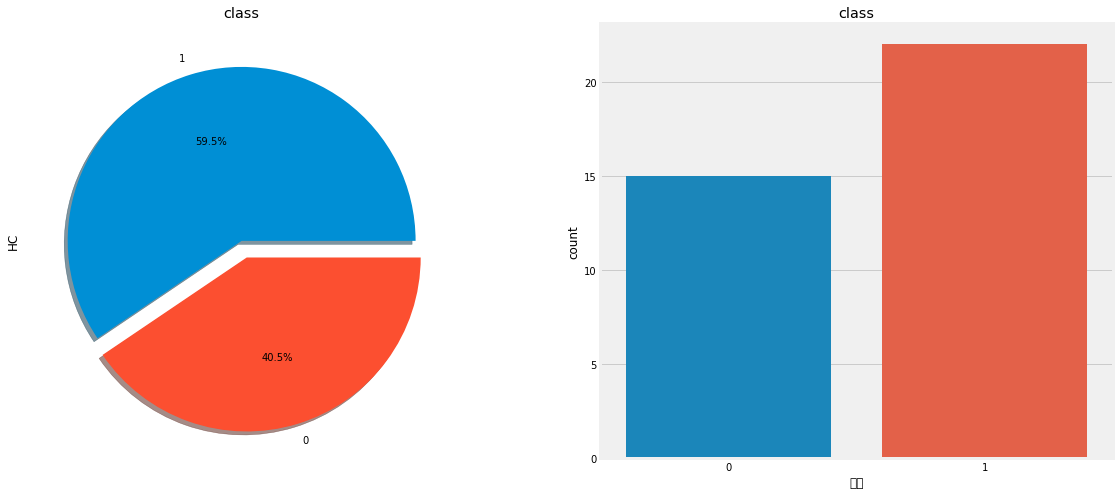

In [112]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['집단'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('class')
ax[0].set_ylabel('HC')
sns.countplot('집단',data=data,ax=ax[1])
ax[1].set_title('class')
plt.show()

In [113]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import matplotlib.pyplot as plt 

# 범주형 변수 -> 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
cat_columns = ['성별','집단']
num_columns = ['나이', '교육연한', 'panel1', 'panel2', 'panel3', 'panel4', 'panel5', 'panel6', 'outLier_num',
               'out_rate', 'panel1Target_var_x', 'panel1Target_var_y', 'panel2Target_var_x', 'panel2Target_var_y', 'panel3Target_var_x', 'panel3Target_var_y', 'panel4Target_var_x', 'panel4Target_var_y', 
               'panel5Target_var_x', 'panel5Target_var_y', 'error', 'panel1_head_distance', 'panel2_head_distance', 'panel3_head_distance', 'panel4_head_distance', 'panel5_head_distance', 'panel7_head_distance',
                 'distance_hand', 'panel1_hand_distance', 'panel2_hand_distance', 'panel3_hand_distance', 'panel4_hand_distance', 'panel5_hand_distance', 'panel7_hand_distance', 'total_time', 'distance_head', 'distance_hand',
                 'head_angular_velocity_average','head_velocity', 'hand_velocity', 'password_error', 'correct']

In [114]:
enc_classes ={}
def encoding_label(x): # x: 범주형 타입의 컬럼
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)

    enc_classes[x.name] = le.classes_  # x.name: 컬럼명

    return label

cat_df = data[cat_columns].apply(encoding_label)
display(cat_df)

,성별,집단
0,0,0
1,1,0
2,0,1
3,1,1
4,0,1
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1


In [115]:
# 연속형 변수 -> feature scaling, normalization
from sklearn.preprocessing import MinMaxScaler
num_df = data[num_columns]
num_df_scaled = MinMaxScaler().fit_transform(num_df)
num_df_normal = pd.DataFrame(num_df_scaled, columns=list(num_df.columns))
display(num_df_normal)
# display(num_df_normal.isnull().sum())

rowName = cat_df.index
dict = {}
for i, v in enumerate(rowName):
    dict[i] = v

num_df_normal = num_df_normal.rename(index=dict)

,나이,교육연한,panel1,panel2,panel3,panel4,panel5,panel6,outLier_num,out_rate,...,panel5_hand_distance,panel7_hand_distance,total_time,distance_head,distance_hand,head_angular_velocity_average,head_velocity,hand_velocity,password_error,correct
0,0.703704,0.941176,0.056689,0.027972,0.039695,0.029024,0.151880,0.179849,0.385714,0.228558,...,0.076212,0.428686,0.157048,0.133055,0.218066,0.258286,0.417918,0.383441,0.571429,1.0
1,0.740741,0.941176,0.038549,0.025175,0.083969,0.052770,0.010526,0.019303,0.800000,0.000000,...,0.035660,0.053515,0.031536,0.064800,0.081894,0.665819,0.701484,0.601827,0.142857,0.6
2,0.481481,0.705882,0.024943,0.009790,0.036641,0.018470,0.000000,0.010358,0.014286,0.385218,...,0.000000,0.034461,0.000000,0.012861,0.010298,1.000000,0.298492,0.538122,0.285714,0.6
3,0.925926,0.823529,0.197279,0.102098,0.351145,0.146438,0.148872,0.264595,0.128571,0.597355,...,0.096657,0.320609,0.341848,0.285482,0.253271,0.111038,0.475510,0.123428,0.571429,0.6
4,0.629630,0.882353,0.081633,0.086713,0.056489,0.215040,0.021053,0.096516,0.071429,0.294959,...,0.037767,0.141000,0.138442,0.064868,0.105422,0.287622,0.084199,0.198701,0.142857,0.6
5,0.500000,0.941176,0.136054,0.051748,0.047328,0.044855,0.024060,0.006591,0.114286,0.159067,...,0.043306,0.029338,0.035951,0.044923,0.097555,0.635002,0.411975,0.631814,0.000000,1.0
6,0.851852,0.941176,0.072562,0.047552,0.116031,0.031662,0.028571,0.026365,0.000000,0.242895,...,0.033457,0.033326,0.051403,0.091432,0.058412,0.544886,0.783419,0.369009,0.000000,1.0
7,0.666667,0.705882,0.120181,0.113287,0.250382,0.054090,0.042105,0.107345,0.000000,0.363875,...,0.089852,0.236692,0.163040,0.167663,0.246228,0.249839,0.582990,0.420908,0.571429,0.6
8,0.981481,0.705882,1.000000,0.734266,0.358779,0.000000,0.482707,0.435970,0.000000,0.394955,...,0.140000,0.475027,0.747398,0.444891,0.393533,0.021457,0.238851,0.000000,0.857143,0.4
9,0.444444,0.529412,0.156463,0.283916,0.244275,0.059367,0.093233,0.249058,0.000000,0.646294,...,0.090815,0.350560,0.312204,0.367984,0.242679,0.125054,0.825261,0.142338,1.000000,0.6


In [116]:
#열 기준 합치기
final_preprocess = cat_df.join(num_df_normal)

In [117]:
# 타겟 설정 - 집단
target = '집단'

# 타겟의 분포 확인
print(final_preprocess[target].value_counts(normalize = True))


X_set = final_preprocess.drop([target], axis = 1)
y_set = final_preprocess[[target]]

1    0.594595
0    0.405405
Name: 집단, dtype: float64


In [118]:
from sklearn.model_selection import train_test_split
X_set = final_preprocess.drop([target], axis = 1)
y_set = final_preprocess[[target]]
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, 
                                                    stratify = y_set,
                                                    random_state = 2) 

In [119]:
# 학습 데이터와 테스트 데이터 안의 결과변수 비율
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

집단
1     0.586207
0     0.413793
dtype: float64
집단
1     0.625
0     0.375
dtype: float64


##메인 코드

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_distribs_rf={'n_estimators': randint(low=1, high=200),#[80, 100, 150, 200],
                   'max_features': ['auto', 'sqrt', 'log2'],
                   'max_depth' : randint(5, 21)}# [3, 5, 10, 15]}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), 
                                      param_distributions = param_distribs_rf, 
                                      cv = 5,
                                      n_iter = 500,
                                      random_state = 2)

random_search_rf.fit(X_train, y_train)


print("Best Parameter: {}".format(random_search_rf.best_params_))

FForest = RandomForestClassifier(max_features = random_search_rf.best_params_['max_features'], 
                                 n_estimators = random_search_rf.best_params_['n_estimators'], 
                                 max_depth = random_search_rf.best_params_['max_depth'], 
                                 class_weight='balanced',
                                 random_state = 2)
FForest.fit(X_train, y_train)

###################################################################################################################

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score,  plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

FForest_pred_test=FForest.predict(X_test)

FForest_confusion_test=confusion_matrix(y_test, FForest_pred_test)
print(FForest_confusion_test)

# print('검증 정확도:', random_search_rf.best_score_)
print("정확도:", accuracy_score(y_test, FForest_pred_test))

Best Parameter: {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 22}
[[3 0]
 [1 4]]
정확도: 0.875


In [122]:
# 모델 저장

import joblib

joblib.dump(FForest, 'FForest.pkl')

['FForest.pkl']

In [123]:
# 모델 불러오기

import joblib

FForest = joblib.load('FForest.pkl')

==============================================================================================================================================================================================================================================

*   밑의 항목은 부수적인 코드입니다. (오차행렬 및 변수 중요도 산출 등)

<Figure size 2160x2160 with 0 Axes>

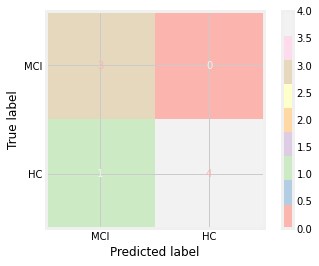

                          Feature  Importance
15             panel3Target_var_x    0.092550
23           panel1_head_distance    0.090553
26           panel4_head_distance    0.062280
22                  distance_head    0.060315
14             panel2Target_var_y    0.059383
38                  distance_hand    0.054848
10                       out_rate    0.050199
17             panel4Target_var_x    0.045253
20             panel5Target_var_y    0.044512
11             panel1Target_var_x    0.034190
18             panel4Target_var_y    0.031502
33           panel4_hand_distance    0.030021
4                          panel2    0.028994
7                          panel5    0.025831
40                  hand_velocity    0.025314
32           panel3_hand_distance    0.023040
41                 password_error    0.022578
13             panel2Target_var_x    0.021465
9                     outLier_num    0.019064
25           panel3_head_distance    0.015882
21                          error 

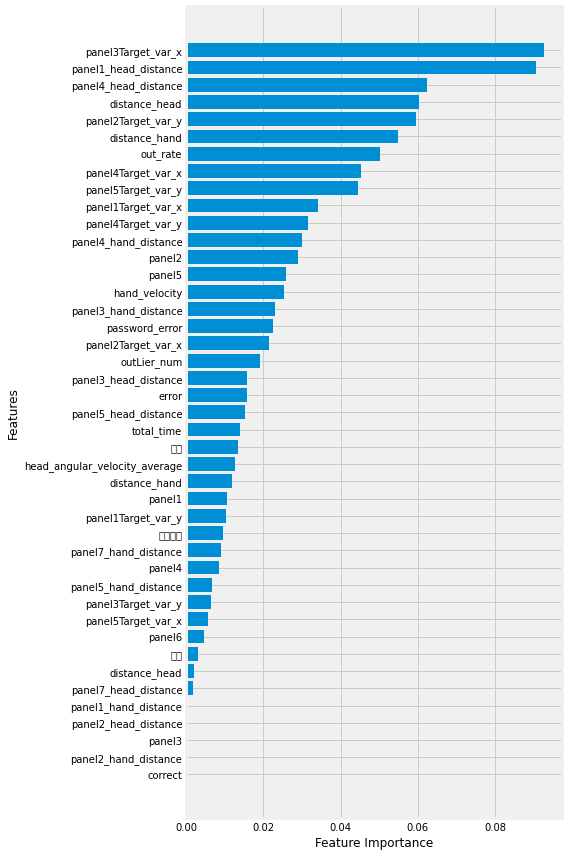

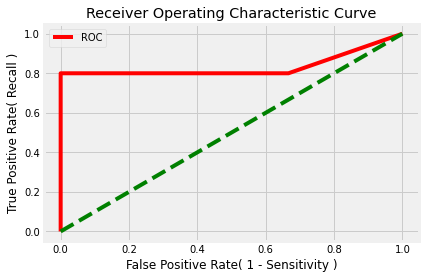

AUC 값: 0.8333


In [126]:
# 오차행렬 시각화
plt.figure(figsize =(30, 30))
plot_confusion_matrix(FForest, 
                      X_test, y_test,
                      include_values = True,
                      display_labels = ['MCI', 'HC'], # 목표변수 이름
                      cmap = 'Pastel1') # 컬러맵
plt.savefig('confusion_matrix.png') # 오차행렬 자료 저장
plt.show() # 따로 그리기

# 변수 중요도 산출
X_variable_name = (['성별', '나이', '교육연한', 'panel1', 'panel2', 'panel3', 'panel4', 'panel5', 'panel6', 'outLier_num',
               'out_rate', 'panel1Target_var_x', 'panel1Target_var_y', 'panel2Target_var_x', 'panel2Target_var_y', 'panel3Target_var_x', 'panel3Target_var_y', 'panel4Target_var_x', 'panel4Target_var_y', 
               'panel5Target_var_x', 'panel5Target_var_y', 'error', 'distance_head', 'panel1_head_distance', 'panel2_head_distance', 'panel3_head_distance', 'panel4_head_distance', 'panel5_head_distance', 'panel7_head_distance',
                 'distance_hand', 'panel1_hand_distance', 'panel2_hand_distance', 'panel3_hand_distance', 'panel4_hand_distance', 'panel5_hand_distance', 'panel7_hand_distance', 'total_time', 'distance_head', 'distance_hand',
                 'head_angular_velocity_average', 'hand_velocity', 'password_error', 'correct'])

dt_importance = pd.DataFrame()
dt_importance['Feature'] = X_variable_name#list(X_set.columns) # 설명변수 이름
dt_importance['Importance'] = FForest.feature_importances_ # 설명변수 중요도 산출

# 변수 중요도 내림차순 정렬
dt_importance.sort_values("Importance", ascending = False, inplace = True)
print(dt_importance.round(8))

# 변수 중요도 시각화
# 변수 중요도 오름차순 정렬
dt_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
plt.figure(figsize =(8, 12))
plt.barh(y = coordinates, width = dt_importance["Importance"], align='center')
plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
plt.xlabel("Feature Importance") # x축 이름
plt.ylabel("Features") # y축 이름
plt.tight_layout()
plt.savefig('feature_importance.png') # 변수 중요도 그래프 저장
plt.show()

# ROC curve 그리기
prob = FForest.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate( 1 - Sensitivity )')
plt.ylabel('True Positive Rate( Recall )')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.savefig('ROC_curve.png')
plt.show()

# AUC 구하기
pred_proba = FForest.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, pred_proba)
print('AUC 값: {0:.4f}'.format(auc))